# Importing Libraries and the Dataset



In [ ]:
import pandas as pd
import numpy as np
import os



df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
a = pd.get_dummies(df['sex'])
df = pd.concat([df.drop(['sex'],axis=1), a],axis=1)

b = pd.get_dummies(df['smoker'])
df = pd.concat([df.drop(['smoker'],axis=1), b],axis=1)


c = pd.get_dummies(df['region'])
df = pd.concat([df.drop(['region'],axis=1), c],axis=1)

"""
3,northeast
2,northwest
1,southeast
0,southwest
"""
print(df)

      age     bmi  children  region      charges  female  male  no  yes
0      19  27.900         0       3  16884.92400       1     0   0    1
1      18  33.770         1       2   1725.55230       0     1   1    0
2      28  33.000         3       2   4449.46200       0     1   1    0
3      33  22.705         0       1  21984.47061       0     1   1    0
4      32  28.880         0       1   3866.85520       0     1   1    0
...   ...     ...       ...     ...          ...     ...   ...  ..  ...
1333   50  30.970         3       1  10600.54830       0     1   1    0
1334   18  31.920         0       0   2205.98080       1     0   1    0
1335   18  36.850         0       2   1629.83350       1     0   1    0
1336   21  25.800         0       3   2007.94500       1     0   1    0
1337   61  29.070         0       1  29141.36030       1     0   0    1

[1338 rows x 9 columns]


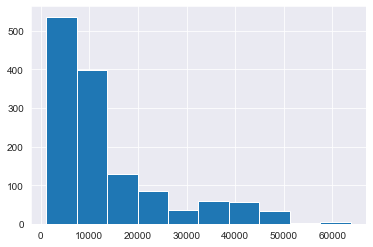

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['charges'''])
plt.show()

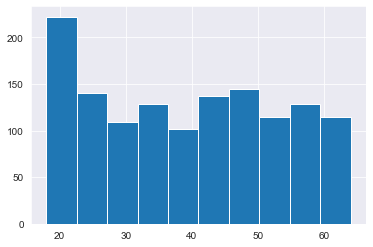

In [ ]:
plt.hist(df['age'])
plt.show()

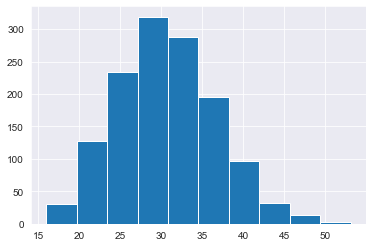

In [ ]:
plt.hist(df['bmi'])
plt.show()

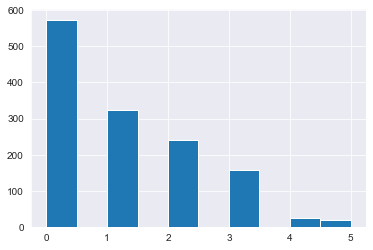

In [ ]:
plt.hist(df['children'])
plt.show()

## Min-Max Scaling

In [ ]:
df['age_n'] = (df['age']-df['age'].min())/(df['age'].max()-df['age'].min())

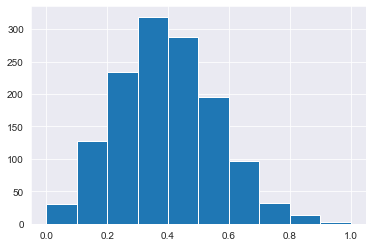

In [ ]:
df['bmi_n'] = (df['bmi']-df['bmi'].min())/(df['bmi'].max()-df['bmi'].min())
plt.hist(df['bmi_n'])
plt.show()

In [ ]:
df.pop('age')
df.pop('bmi')

#Dividing Dataset to Train and Test Datasets

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['charges'],axis=1)
y = df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('X_train: ',X_train.shape,'\nX_test: ',X_test.shape,'\ny_train: ',y_train.shape,'\ny_test: ',y_test.shape)

X_train:  (1070, 8) 
X_test:  (268, 8) 
y_train:  (1070,) 
y_test:  (268,)


In [ ]:
X_train

,children,region,female,male,no,yes,age_n,bmi_n
621,4,3,0,1,0,1,0.413043,0.488028
194,0,2,0,1,1,0,0.000000,0.496906
240,2,0,1,0,0,1,0.108696,0.557170
1168,2,3,0,1,1,0,0.304348,0.517622
1192,1,0,1,0,1,0,0.869565,0.442158
...,...,...,...,...,...,...,...,...
763,0,0,0,1,1,0,0.195652,0.270917
835,2,2,0,1,1,0,0.521739,0.538337
1216,0,2,0,1,1,0,0.478261,0.245359
559,0,1,0,1,1,0,0.021739,0.526500


# Using Regression Methods 

Lineer Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Lineer...................")

pred_train_lr= lr.predict(X_train)
print('train Root MSE: ',np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print('train R**2 score: ',r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print('test Root MSE: ',np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print('test R**2 score: ',r2_score(y_test, pred_test_lr))


Lineer...................
train Root MSE:  6142.440924408568
train R**2 score:  0.7368306228430945
test Root MSE:  5643.219748880902
test R**2 score:  0.7998747145449959


In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict


cv_results = cross_val_score(reg,X,y,cv=5)
print(cv_results)


print("Ortalama 5 katlı cross_validation: {}".format(np.mean(cv_results)))

[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
Ortalama 5 katlı cross_validation: 0.7472559473580954


Ridge Regression


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
rr = Ridge(alpha=1.0)
print("Ridge...................")
rr.fit(X_train, y_train)
pred_train_rr= rr.predict(X_train)
print('train Root MSE: ',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('train R**2 score: ',r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('test Root MSE: ',np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print('test R**2 score: ',r2_score(y_test, pred_test_rr))

Ridge...................
train Root MSE:  6142.943944998294
train R**2 score:  0.7367875178177858
test Root MSE:  5649.098731417348
test R**2 score:  0.7994575250844261


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.3)
model_lasso.fit(X_train, y_train)

print("Lasso...................")

pred_train_lasso= model_lasso.predict(X_train)
print('train Root MSE: ',np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('train R**2 score: ',r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print('test Root MSE: ',np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print('test R**2 score: ',r2_score(y_test, pred_test_lasso))


Lasso...................
train Root MSE:  6142.441354827166
train R**2 score:  0.7368305859610147
test Root MSE:  5643.41905441384
test R**2 score:  0.799860578366435


Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
print("ElasticNet...................")

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train)
pred_train_enet= model_enet.predict(X_train)
print('train Root MSE: ',np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print('train R**2 score: ',r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print('test Root MSE: ',np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print('test R**2 score: ',r2_score(y_test, pred_test_enet))

ElasticNet...................
train Root MSE:  6154.314840104868
train R**2 score:  0.7358121771300434
test Root MSE:  5683.046702284619
test R**2 score:  0.7970399832372896


Polynomial Regression

In [ ]:
x_train_poly=X_train
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
poly_df=poly.fit_transform(x_train_poly)
lin=LinearRegression()
lin.fit(poly_df,y_train)
y_pred_poly=lin.predict(poly_df)

In [ ]:
print(r2_score(y_train,y_pred_poly))

0.4626180763138523
